# TikTok Song Recommender

**Group Members:**
Alex Kim, Bolun Zhang, Davis Gill, & Ruby Nie



## Sourcing Data

### Scraper

In [ ]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Unstructure_Project_Scraper

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import numpy as np
from random import randint
from time import sleep


cid ='4d666e1edfa34465980eaf407b531c2a'
secret ='732d1369e81e4d6cb9d9a57121238263'
#uri = 'spotify:playlist:4SWt6k4KUSNzmgRtCTzOKM'#2023
#uri = 'spotify:playlist:4oOBdIjflKzajbn7Gf8WNI' #2022
#uri = 'spotify:playlist:5m1KDrOaJ3aYN7QqyBrNCM' #2021
#uri = 'spotify:playlist:4yeF8WVBDCQV2VEQWZxaZJ' #2020
#uri = 'spotify:playlist:1hpCynGYwF9Wo5GM8zvf4u' #2019

#uri = 'spotify:playlist:6UeSakyzhiEt4NB3UAd6NQ'#billboard this week
#uri = 'spotify:playlist:4e36iSHdNaSDaIfOKmCvXd' # hits viral 2023
uri = 'spotify:playlist:0ACR7KZTHGooTD0OajSn5D'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


#insert the URI as a string into the function
def get_album_tracks(uri_info):
    uri = []
    track_name = []
    artist = []
    duration = []
    explicit = []
    one = sp.playlist_tracks(uri_info, limit=100, offset=0, market='US')
    sleep(randint(2,8))
    two = sp.playlist_tracks(uri_info, limit=100, offset=100, market='US')
    sleep(randint(2,8))
    three = sp.playlist_tracks(uri_info, limit=100, offset=200, market='US')
    sleep(randint(2,8))
    four = sp.playlist_tracks(uri_info, limit=100, offset=300, market='US')
    sleep(randint(2,8))
    five = sp.playlist_tracks(uri_info, limit=100, offset=400, market='US')
    df1 = pd.DataFrame(one)#.iloc[1:,:].reset_index().iloc[:,1:]
    df3 = pd.DataFrame(two)
    df4 = pd.DataFrame(three)
    df5 = pd.DataFrame(four)
    df6 = pd.DataFrame(five)

    for i, x in df1['items'].items():
        #print(x)
        try:
          uri.append(x['track']['uri'])
          track_name.append(x['track']['name'])
          artist.append(x['track']['artists'][0]['name'])
          explicit.append(x['track']['explicit'])
        except:
          pass


    for i, x in df3['items'].items():
        try:
          uri.append(x['track']['uri'])
          track_name.append(x['track']['name'])
          artist.append(x['track']['artists'][0]['name'])
          explicit.append(x['track']['explicit'])
        except:
          pass


    for i, x in df4['items'].items():
        try:
            uri.append(x['track']['uri'])
            track_name.append(x['track']['name'])
            artist.append(x['track']['artists'][0]['name'])
            explicit.append(x['track']['explicit'])
        except:
            pass

    for i, x in df5['items'].items():
        try:
            uri.append(x['track']['uri'])
            track_name.append(x['track']['name'])
            artist.append(x['track']['artists'][0]['name'])
            explicit.append(x['track']['explicit'])
        except:
            pass

    for i, x in df6['items'].items():
        try:
            uri.append(x['track']['uri'])
            track_name.append(x['track']['name'])
            artist.append(x['track']['artists'][0]['name'])
            explicit.append(x['track']['explicit'])
        except:
            pass

    df2 = pd.DataFrame({
            'uri':uri,
            'track_name':track_name,
            'artist':artist,
            'explicit':explicit})

    return df2


#insert output dataframe from the get_album_tracks function
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    count = 0
    for i in df['uri']:
        sleep(randint(0,5))

        count += 1
        if count % 10 == 0:
          print(count)

        if 'track'in i:
          for x in sp.audio_features(tracks=[i]):
              #sleep(randint(2,8))
              danceability.append(x['danceability'])
              energy.append(x['energy'])
              key.append(x['key'])
              loudness.append(x['loudness'])
              speechiness.append(x['speechiness'])
              acousticness.append(x['acousticness'])
              instrumentalness.append(x['instrumentalness'])
              liveness.append(x['liveness'])
              valence.append(x['valence'])
              tempo.append(x['tempo'])


    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})

    return df2


df1= get_album_tracks(uri)
print('track uri done')
df2 = get_track_info(df1)
print('audio_feature_done')

In [ ]:
data = df1.merge(df2,how = 'left',left_index= True, right_index= True)

def popularity(df):
    empty = []
    for i in df['uri']:
      if 'track'in i:
            series_track = pd.Series(sp.track(i))
            empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2['popularity']


data = data.merge(popularity(df1),left_index= True, right_index= True)
print('popularity done')


In [ ]:


#function to scrape lyrics from genius
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    print('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    soup = BeautifulSoup(page.text, 'html.parser')
    sleep(randint(0,5))
    lyrics = soup.find("div", attrs = {'class' : "Lyrics__Container-sc-1ynbvzw-1 kUgSbL",'data-lyrics-container':"true"}) #Lyrics__Container-sc-1ynbvzw-1 kUgSbL


    if lyrics != None:
        lyrics = lyrics.text
        print(lyrics)
    else:
        lyrics = None
    return lyrics


def lyrics_onto_frame(df1):
    lyrics = []

    for i in range(len(df1)):
      if i%10 == 0:
        print(i)
      lyrics.append(scrape_lyrics(data['artist'][i],data['track_name'][i]))

    df1['lyrics'] = np.array(lyrics)

    return df1


data = lyrics_onto_frame(data)

In [ ]:
data.dropna().drop_duplicates()

In [ ]:
data.to_csv('tiktok_hit_2021.csv')

### Import CSV

In [ ]:
import pandas as pd

# Specify the file path (assuming the CSV file is in the current directory)
file_path = 'tiktok_hit_2023.csv'

# Read the CSV file into a DataFrame
top_2023_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
top_2023_df.head()


## EDA

### Summary Statistics

In [ ]:
# Summary statistics for the target variable
popularity_stats = top_2023_df['popularity'].describe()

# Summary statistics for other numeric variables
other_stats = top_2023_df[['danceability', 'energy', 'loudness', 'tempo']].describe()
print(other_stats)


       danceability      energy    loudness       tempo
count    112.000000  112.000000  112.000000  112.000000
mean       0.629866    0.617616   -6.971955  125.626946
std        0.141790    0.159271    2.773178   28.372960
min        0.309000    0.129000  -20.149000   72.498000
25%        0.520000    0.521250   -8.144750  106.501000
50%        0.622500    0.630500   -6.592000  123.411000
75%        0.731750    0.733000   -5.021500  143.307250
max        0.954000    0.912000   -2.653000  210.164000


### Correlation Analysis

#### Correlation Matrix

<ipython-input-7-0d1e14e5e2ff>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = top_2023_df.corr()


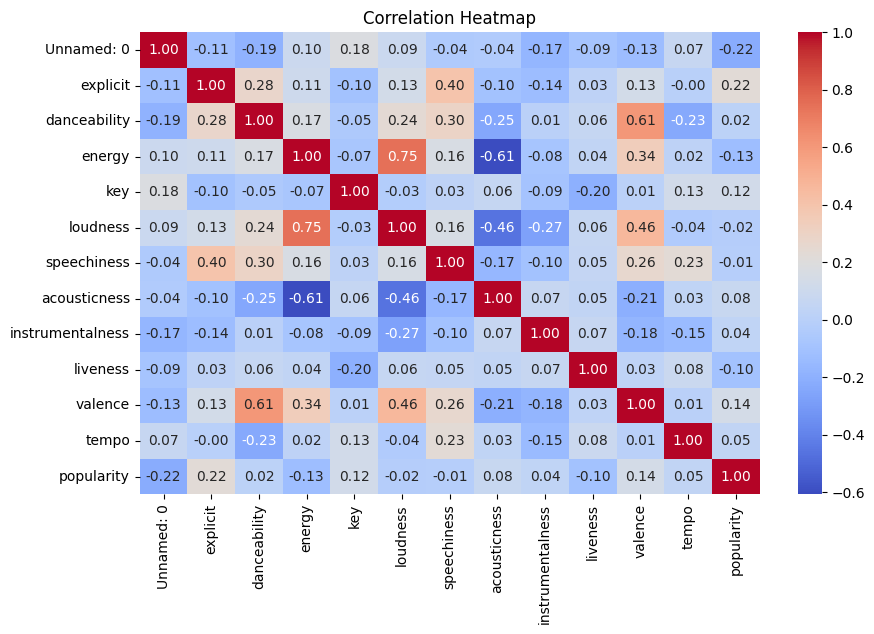

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = top_2023_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Scatter Plots - seem pretty useless as per correlation matrix there aren't too many notable correlations with popularity

#### Box Plots

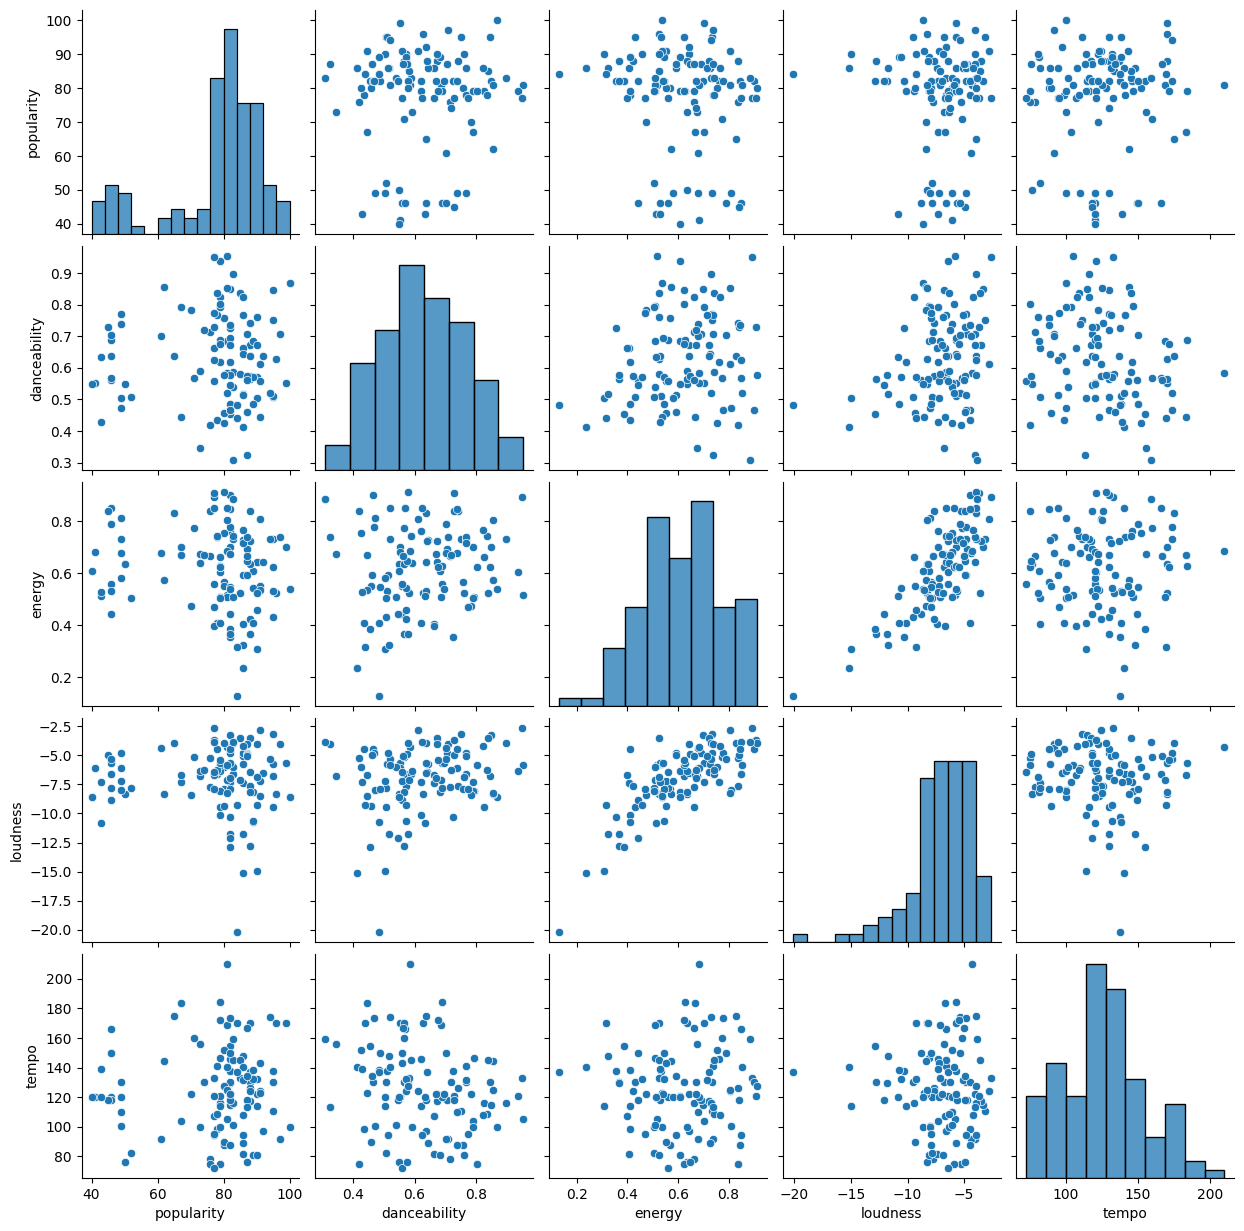

In [ ]:
# Pair plot
sns.pairplot(top_2023_df[['popularity', 'danceability', 'energy', 'loudness', 'tempo']])
plt.show()


## Topic Modeling

In [ ]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 114.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 43.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.

In [ ]:
# Import necessary libraries
import pandas as pd
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import numpy as np
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving tiktok_hit_2022.csv to tiktok_hit_2022.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving tiktok_hit_2023.csv to tiktok_hit_2023.csv


In [ ]:
df_2022 = pd.read_csv('tiktok_hit_2022.csv')
df_2023 = pd.read_csv('tiktok_hit_2023.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.concat([df_2022, df_2023], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk

# Download the 'punkt' tokenizer data
nltk.download('punkt')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define stop words
stop_words = stopwords.words('english')
new_stop_words = ['ooh', 'yeah', 'hey', 'whoa', 'woah', 'ohh', 'was', 'mmm', 'oooh', 'yah', 'yeh', 'hmm', 'deh', 'doh', 'jah','verse','chorus']
stop_words.extend(new_stop_words)

# Function to preprocess lyrics and retain only nouns
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    pos_tags = pos_tag(tokens)

    # Keep nouns only (NN, NNS, NNP, NNPS) and lemmatize them
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='n') for token, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]

    tokens = [token for token in tokens if token not in stop_words]

    # Filter out short tokens and numeric tokens
    tokens = [token for token in tokens if len(token) > 2 and not token.isnumeric()]

    return tokens

df['processed_lyrics'] = df['lyrics'].apply(preprocess)

dictionary = Dictionary(df['processed_lyrics'])
corpus = [dictionary.doc2bow(text) for text in df['processed_lyrics']]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.009*"intro" + 0.008*"miku" + 0.007*"time" + 0.007*"dick" + 0.006*"girl"')
(1, '0.010*"woman" + 0.010*"day" + 0.009*"eye" + 0.008*"bitch" + 0.007*"time"')
(2, '0.025*"wit" + 0.011*"mary" + 0.008*"day" + 0.008*"night" + 0.008*"intro"')
(3, '0.022*"girl" + 0.014*"love" + 0.014*"baby" + 0.011*"get-get" + 0.010*"bitch"')
(4, '0.019*"time" + 0.017*"way" + 0.016*"love" + 0.011*"girl" + 0.009*"baby"')


In [ ]:
# import pandas as pd
# print(pd.__version__)


In [ ]:
# pip uninstall pandas


In [ ]:
# pip install pandas==1.5.3


In [ ]:
# Visualization of the topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## Lift and Sentiment



In [ ]:
# Import necessary libraries
from collections import Counter

# Define a function to calculate lift for a word in relation to song popularity
def calculate_lift_for_word(word, df, popularity_threshold=75):
    # Calculate P(A ∩ B) - the probability that a song is both popular and contains the word
    num_AB = len(df[(df['popularity'] >= popularity_threshold) & df['processed_lyrics'].apply(lambda x: word in x)])

    # Calculate P(A) - the probability that a song contains the word
    num_A = len(df[df['processed_lyrics'].apply(lambda x: word in x)])

    # Calculate P(B) - the probability that a song is popular
    num_B = len(df[df['popularity'] >= popularity_threshold])

    # Calculate Lift
    if num_A == 0 or num_B == 0:
        return 0
    else:
        return (num_AB / len(df)) / ((num_A / len(df)) * (num_B / len(df)))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !pip install afinn
from afinn import Afinn

# Initialize the AFINN lexicon
afinn = Afinn()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=6867408a49ff7bb40af369d895d3f01a600684022b8e30eff968e94dd83c375d
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
def calculate_sentiment_score(word):
    sentiment_score = afinn.score(word)
    return sentiment_score

for topic_id, words in topics:
    # print(f"Topic {topic_id}:")
    words = [word.split('*')[1].strip('" ') for word in words.split(' + ')]

    for word in words:
        lift = calculate_lift_for_word(word, df)
        sentiment_score = calculate_sentiment_score(word)
        # print(f"{word}: Lift = {lift:.2f}, Sentiment Score = {sentiment_score}")
    # print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create an empty list to store the data
data = []

# Iterate through each topic and its associated words
for topic_id, words in topics:
    topic_words = [word.split('*')[1].strip('" ') for word in words.split(' + ')]

    for word in topic_words:
        # Calculate lift for the word
        lift = calculate_lift_for_word(word, df)

        # Calculate sentiment score for the word
        sentiment_score = calculate_sentiment_score(word)

        # Append the data to the list
        data.append({'Topic': topic_id, 'Word': word, 'Lift': lift, 'Sentiment': sentiment_score})

# Create the 'lift_sentiment_df' DataFrame
lift_sentiment_df = pd.DataFrame(data)

# Convert 'Topic' column to integers for consistency
lift_sentiment_df['Topic'] = lift_sentiment_df['Topic'].astype(int)

lift_sentiment_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Word,Lift,Sentiment
0,0,intro,1.090658,0.0
1,0,miku,1.009868,0.0
2,0,time,1.022652,0.0
3,0,dick,1.346491,-4.0
4,0,girl,1.226269,0.0
5,1,woman,1.211842,0.0
6,1,day,0.886714,0.0
7,1,eye,0.982575,0.0
8,1,bitch,0.946752,-5.0
9,1,time,1.022652,0.0


In [ ]:
# Create a subset of lift_sentiment_df where lift > 1 and sentiment != 0
subset_df = lift_sentiment_df[(lift_sentiment_df['Lift'] > 1) & (lift_sentiment_df['Sentiment'] != 0)]
subset_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Word,Lift,Sentiment
3,0,dick,1.346491,-4.0
16,3,love,1.098453,3.0
22,4,love,1.098453,3.0


## Recommender

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_release_Oct_dropped.csv to new_release_Oct_dropped.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving billboard_week41_2023_dropped.csv to billboard_week41_2023_dropped.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving hits_viral_2023_dropped.csv to hits_viral_2023_dropped.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving new_release_sep_2023_dropped.csv to new_release_sep_2023_dropped.csv


In [ ]:
###Recommender For 2023 Songs Up to September###

# Import additional necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the new songs datasets
new_release = pd.read_csv('new_release_sep_2023_dropped.csv')  # Change paths as needed
hits_viral = pd.read_csv('hits_viral_2023_dropped.csv')
billboard = pd.read_csv('billboard_week41_2023_dropped.csv')

# Combine the new songs datasets into one DataFrame
new_songs = pd.concat([new_release, hits_viral, billboard], ignore_index=True)

# Function to preprocess lyrics and retain only nouns
def preprocess(text):
    if isinstance(text, str):  # Add this line to check if text is a string
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)

        # Keep nouns only (NN, NNS, NNP, NNPS) and lemmatize them
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token, pos='n') for token, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]

        tokens = [token for token in tokens if token not in stop_words]

        # Filter out short tokens and numeric tokens
        tokens = [token for token in tokens if len(token) > 2 and not token.isnumeric()]

        return tokens
    else:  # And this part to return an empty list if text is not a string
        return []


# Preprocess the lyrics of the new songs
new_songs['processed_lyrics'] = new_songs['lyrics'].apply(preprocess)

# Feature extraction for both TikTok and new songs datasets
def extract_features(df):
    features = []

    for index, row in df.iterrows():
        song_features = row[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].tolist()

        lyrics_features = [0] * len(lift_sentiment_df) * 2  # Two features (lift, sentiment) for each word

        for word in row['processed_lyrics']:
            if word in lift_sentiment_df['Word'].values:
                word_index = lift_sentiment_df[lift_sentiment_df['Word'] == word].index[0]
                lyrics_features[word_index * 2] = lift_sentiment_df.loc[word_index, 'Lift']
                lyrics_features[word_index * 2 + 1] = lift_sentiment_df.loc[word_index, 'Sentiment']

        song_features.extend(lyrics_features)
        features.append(song_features)

    return pd.DataFrame(features)

# Extract features
tiktok_features = extract_features(df)
new_songs_features = extract_features(new_songs)

# Normalize the features
scaler = MinMaxScaler()
tiktok_features = scaler.fit_transform(tiktok_features)
new_songs_features = scaler.transform(new_songs_features)  # Use the same scaler

# Compute the similarity scores
similarity_scores = cosine_similarity(new_songs_features, tiktok_features)

# Get the total similarity scores
total_similarity_scores = np.sum(similarity_scores, axis=1)

# Create a DataFrame to hold the songs and their scores
recommended_songs_df = pd.DataFrame(new_songs.iloc[top_10_indices])
recommended_songs_df['similarity_score'] = total_similarity_scores[top_10_indices]

# Sort the songs by similarity score in descending order
recommended_songs_df = recommended_songs_df.sort_values(by='similarity_score', ascending=False)

# Print the top 10 recommendations ranked by likelihood to become popular
print("Top 10 song recommendations ranked by likelihood to become popular:")
for index, row in recommended_songs_df.iterrows():
    print(f"- {row['track_name']} by {row['artist']} (Score: {row['similarity_score']:.2f})")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 song recommendations ranked by likelihood to become popular:
- Super Shy by NewJeans (Score: 237.03)
- Good Good by USHER (Score: 236.37)
- TULUM by Peso Pluma (Score: 235.45)
- Dial Drunk (with Post Malone) by Noah Kahan (Score: 235.37)
- Oh U Went (feat. Drake) by Young Thug (Score: 234.96)
- Thinkin’ Bout Me by Morgan Wallen (Score: 234.93)
- Sympathy by Declan McKenna (Score: 234.70)
- BIPOLAR by Peso Pluma (Score: 234.37)
- Ella Baila Sola by Eslabon Armado (Score: 234.31)
- Sticks and Stones by Blur (Score: 234.30)


In [ ]:
#List of Attributes of Recommended Songs
# List of recommended songs
recommended_songs = [
    "Super Shy",
    "Good Good",
    "TULUM",
    "Dial Drunk (with Post Malone)",
    "Oh U Went (feat. Drake)",
    "Thinkin’ Bout Me",
    "Sympathy",
    "BIPOLAR",
    "Ella Baila Sola",
    "Sticks and Stones"
]

# Filter the new_songs DataFrame to get only the recommended songs
recommended_songs_df = new_songs[new_songs['track_name'].isin(recommended_songs)]

# Print the recommended songs data
print(recommended_songs_df[['track_name', 'artist', 'danceability', 'energy', 'valence', 'tempo', 'popularity']])


                        track_name          artist  danceability  energy  \
9                  Ella Baila Sola  Eslabon Armado         0.668   0.758   
10               Sticks and Stones            Blur         0.721   0.678   
20                        Sympathy  Declan McKenna         0.678   0.760   
33                       Super Shy        NewJeans         0.776   0.817   
124               Thinkin’ Bout Me   Morgan Wallen         0.656   0.757   
141  Dial Drunk (with Post Malone)      Noah Kahan         0.667   0.613   
164                      Good Good           USHER         0.753   0.669   
183                          TULUM      Peso Pluma         0.557   0.866   
196        Oh U Went (feat. Drake)      Young Thug         0.808   0.789   
197                        BIPOLAR      Peso Pluma         0.776   0.701   

     valence    tempo  popularity  
9      0.834  147.989          89  
10     0.772  118.997          41  
20     0.871  113.994          49  
33     0.515  149.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Past Iterations of Recommendation Model

In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving new_release_sep_2023_dropped.csv to new_release_sep_2023_dropped.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving billboard_week41_2023_dropped.csv to billboard_week41_2023_dropped.csv


In [ ]:
#Compute Average Lift and Sentiment of Each Song Function
def compute_avg_lift_sentiment(song_words):
    lift_scores = []
    sentiment_scores = []
    for word in song_words:
        scores = lift_sentiment_df[lift_sentiment_df['Word'] == word][['Lift', 'Sentiment']]
        if not scores.empty:
            lift_scores.append(scores['Lift'].values[0])
            sentiment_scores.append(scores['Sentiment'].values[0])

    avg_lift = np.mean(lift_scores) if lift_scores else 0
    avg_sentiment = np.mean(sentiment_scores) if sentiment_scores else 0

    return avg_lift, avg_sentiment

df['avg_lift'], df['avg_sentiment'] = zip(*df['processed_lyrics'].map(compute_avg_lift_sentiment))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Load New Dataset and Calculate their Average Lift and Sentiment
new_songs = pd.read_csv('hits_viral_2023_dropped.csv')
new_songs['processed_lyrics'] = new_songs['lyrics'].apply(preprocess)
new_songs['avg_lift'], new_songs['avg_sentiment'] = zip(*new_songs['processed_lyrics'].map(compute_avg_lift_sentiment))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Feature Engineering
#Combine numerical features, topic distribution, and the computed average lift and sentiment into a feature vector for each song.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Combine features for training set
numerical_features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'avg_lift', 'avg_sentiment']].values
numerical_features_normalized = scaler.fit_transform(numerical_features)

# Combine features for new songs
new_song_features = new_songs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'avg_lift', 'avg_sentiment']].values
new_song_features_normalized = scaler.transform(new_song_features)  # Use the same scaler to ensure the same scaling


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Calculate Similarity Between Training Songs (Popular TikTok Songs) and Test (2023 New Releases)
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(new_song_features_normalized, numerical_features_normalized)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_n = 5
top_n_indices = np.argsort(similarity_scores, axis=1)[:, -top_n:]

for i, indices in enumerate(top_n_indices):
    print(f"For the song '{new_songs.iloc[i]['track_name']}' by {new_songs.iloc[i]['artist']}, the top {top_n} similar songs from TikTok hits are:")
    for index in indices:
        print(f"- '{df.iloc[index]['track_name']}' by {df.iloc[index]['artist']}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For the song 'Paint The Town Red' by Doja Cat, the top 5 similar songs from TikTok hits are:
- 'Squidward Nose' by cupcakKe
- 'Conceited' by Flo Milli
- 'WERKKK' by TisaKorean
- 'vent' by Baby Keem
- 'Paint The Town Red' by Doja Cat


For the song 'greedy' by Tate McRae, the top 5 similar songs from TikTok hits are:
- 'Woman' by Doja Cat
- 'First Class' by Jack Harlow
- 'Sunroof' by Nicky Youre
- 'Good Times Go' by Nicky Youre
- 'greedy' by Tate McRae


For the song 'Strangers' by Kenya Grace, the top 5 similar songs from TikTok hits are:
- 'Daylight' by David Kushner
- 'Candy Shop' by 50 Cent
- 'Bad Habit' by Steve Lacy
- 'Here With Me' by d4vd
- 'Strangers' by Kenya Grace


For the song 'vampire' by Olivia Rodrigo, the top 5 similar songs from TikTok hits are:
- 'Infinity' by Jaymes Young
- 'Love Story' by Sarah Cothran
- 'Structure' by Odd Sweetheart
- 'Call Out My Name' by The Weeknd
- 'vampire' by Olivia Rodrigo


For the song 'Cruel Summer' by Taylor Swift, the top 5 similar song

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Make sure to have these nltk resources downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Load the provided lift and sentiment data
# Ensure this DataFrame is loaded or calculated before running this part of the code
# lift_sentiment_df = ...

# Load the new songs dataset
new_songs = pd.read_csv('new_release_Oct_dropped.csv')  # Update with the path of the new CSV file

# Define stop words
stop_words = stopwords.words('english')

# Function to preprocess lyrics and retain only nouns
def preprocess(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token, pos='n') for token, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
        tokens = [token for token in tokens if token not in stop_words and len(token) > 2 and not token.isnumeric()]
        return tokens
    else:
        return []

# Preprocess the lyrics of the new songs
new_songs['processed_lyrics'] = new_songs['lyrics'].apply(preprocess)

# Feature extraction for both TikTok and new songs datasets
def extract_features(df):
    features = []
    for index, row in df.iterrows():
        song_features = row[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].tolist()

        lyrics_features = [0] * len(lift_sentiment_df) * 2

        for word in row['processed_lyrics']:
            if word in lift_sentiment_df['Word'].values:
                word_index = lift_sentiment_df[lift_sentiment_df['Word'] == word].index[0]
                lyrics_features[word_index * 2] = lift_sentiment_df.loc[word_index, 'Lift']
                lyrics_features[word_index * 2 + 1] = lift_sentiment_df.loc[word_index, 'Sentiment']

        song_features.extend(lyrics_features)
        features.append(song_features)

    return pd.DataFrame(features)

# Replace df with the DataFrame containing your TikTok songs data
tiktok_features = extract_features(df)
new_songs_features = extract_features(new_songs)

# Normalize the features
scaler = MinMaxScaler()
tiktok_features = scaler.fit_transform(tiktok_features)
new_songs_features = scaler.transform(new_songs_features)

# Compute the similarity scores
similarity_scores = cosine_similarity(new_songs_features, tiktok_features)

# Get the top 10 songs from the new dataset that are most similar to the TikTok hits
total_similarity_scores = np.sum(similarity_scores, axis=1)
top_10_indices = total_similarity_scores.argsort()[-10:][::-1]

# Print the top 10 recommendations
print("Top 10 song recommendations:")
for index in top_10_indices:
    print(f"- {new_songs.iloc[index]['track_name']} by {new_songs.iloc[index]['artist']}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 song recommendations:
- Super Shy by NewJeans
- Good Good by USHER
- TULUM by Peso Pluma
- Dial Drunk (with Post Malone) by Noah Kahan
- Oh U Went (feat. Drake) by Young Thug
- Thinkin’ Bout Me by Morgan Wallen
- Sympathy by Declan McKenna
- BIPOLAR by Peso Pluma
- Ella Baila Sola by Eslabon Armado
- Sticks and Stones by Blur


                        track_name          artist  danceability  energy  \
9                  Ella Baila Sola  Eslabon Armado         0.668   0.758   
10               Sticks and Stones            Blur         0.721   0.678   
20                        Sympathy  Declan McKenna         0.678   0.760   
33                       Super Shy        NewJeans         0.776   0.817   
124               Thinkin’ Bout Me   Morgan Wallen         0.656   0.757   
141  Dial Drunk (with Post Malone)      Noah Kahan         0.667   0.613   
164                      Good Good           USHER         0.753   0.669   
183                          TULUM      Peso Pluma         0.557   0.866   
196        Oh U Went (feat. Drake)      Young Thug         0.808   0.789   
197                        BIPOLAR      Peso Pluma         0.776   0.701   

     valence    tempo  popularity  
9      0.834  147.989          89  
10     0.772  118.997          41  
20     0.871  113.994          49  
33     0.515  149.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
